In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# Image Binary Classification (Modified)

## Task 3: Classification with a Modified Training/Test

Load only the training set

In [2]:
def load_train_dataset_only():
    # Open the HDF5 file for reading
    with h5py.File("train_catvnoncat.h5", "r") as train_file:
        # Load training features (images), labels, and class names
        X_all = np.array(train_file["train_set_x"][:])
        y_all = np.array(train_file["train_set_y"][:])
        classes = np.array(train_file["list_classes"][:])
    return X_all, y_all, classes

# Load the training dataset
X_all, y_all, classes = load_train_dataset_only()

# Print the shapes of the loaded data and class names
print("X_all shape:", X_all.shape)
print("y_all shape:", y_all.shape)
print("Classes:", classes)

X_all shape: (209, 64, 64, 3)
y_all shape: (209,)
Classes: [b'non-cat' b'cat']


In [3]:
last_digit = 8

n_train_new = 160 + last_digit

X_train = X_all[:n_train_new] # beginning to (not including) index of n_train_new
y_train = y_all[:n_train_new]

X_test = X_all[n_train_new:] # from index of n_train_new to end
y_test = y_all[n_train_new:]

print("New training set size:", X_train.shape[0])
print("New test set size:", X_test.shape[0])
print("Train label shape:", y_train.shape)
print("Test label shape:", y_test.shape)

New training set size: 168
New test set size: 41
Train label shape: (168,)
Test label shape: (41,)


In [4]:
m_train = X_train.shape[0] # Num training examples
m_test = X_test.shape[0]   # Num test examples

# Flatten the images, normalize pixel values to [0, 1]
X_train_flat = X_train.reshape(m_train, -1) / 255.0
X_test_flat = X_test.reshape(m_test, -1) / 255.0

print("Flattened train shape:", X_train_flat.shape)
print("Flattened test shape:", X_test_flat.shape)

Flattened train shape: (168, 12288)
Flattened test shape: (41, 12288)


In [5]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def add_bias(X):
  return np.c_[np.ones((X.shape[0], 1)), X] # column of ones to input

def cross_entropy_loss(y, y_hat):
  eps = 1e-15
  y_hat = np.clip(y_hat, eps, 1 - eps) # avoid log(0) or log(1)
  return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

# Predict labels (0 or 1) based on learned parameters (theta)
def predict(X, theta):
  probs = sigmoid(add_bias(X) @ theta)
  return (probs >= 0.5).astype(int)

In [6]:
def train_logreg_gd(X, y, learning_rate=0.01, num_epochs=2000):
  X_b = add_bias(X)

  # Initialize parameters (theta) to zeros
  theta = np.zeros(X_b.shape[1])
  losses = []

  # Iterate for a specific num iterations
  for _ in range(num_epochs):
    y_hat = sigmoid(X_b @ theta)

    loss = cross_entropy_loss(y, y_hat)
    losses.append(loss)

    # Calculate the gradient of the loss function
    grad = (X_b.T @ (y_hat - y)) / X_b.shape[0]
    # Update parameters using gradient descent
    theta -= learning_rate * grad

  return theta, losses

In [7]:
learning_rate = 0.01 # Set learning rate for gradient descent
num_epochs = 2000    # set num training epochs

# Train logistic regression model using grad descent
theta, losses = train_logreg_gd(
    X_train_flat, y_train,
    learning_rate=learning_rate,
    num_epochs=num_epochs
)

print("Final loss:", losses[-1]) # after training

Final loss: 0.05150113504790714


In [8]:
# Make predictions on the training and test sets
train_preds = predict(X_train_flat, theta)
test_preds = predict(X_test_flat, theta)

# Calculate training and test accuracies
train_acc = np.mean(train_preds == y_train)
test_acc = np.mean(test_preds == y_test)

# Print the calculated accuracies
print(f"Training accuracy: {train_acc:.3f}") # 1
print(f"Test accuracy:     {test_acc:.3f}")

Training accuracy: 1.000
Test accuracy:     0.561


In [9]:
# Find indices where predictions do not match actual labels
mis_idx = np.where(test_preds != y_test)[0]

print("Misclassified test indices (0-based):")
print(mis_idx)
print("Number misclassified:", len(mis_idx))

Misclassified test indices (0-based):
[ 1  2  3  7  9 11 15 17 20 24 27 28 29 30 32 36 37 39]
Number misclassified: 18


This modified training set had less to actually train off of, so it makes sense that there would be more misclassified test images than in the original set. The modified training/test split led to a decrease in test accuacy.

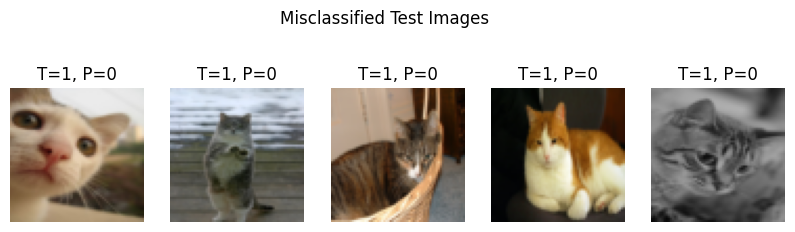

In [10]:
# Display some misclassified images
plt.figure(figsize=(10, 3))

for i, idx in enumerate(mis_idx[:5]):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[idx])
    plt.title(f"T={y_test[idx]}, P={test_preds[idx]}")
    plt.axis("off")

plt.suptitle("Misclassified Test Images")
plt.show()